# Step6: UTAUT2

In [2]:
import numpy as np
import pandas as pd
# import plot_likert
import matplotlib.pyplot as plt

from scipy import stats
from pandas.api.types import CategoricalDtype
from pprint import pprint 

In [3]:
UTAUT= pd.read_csv("step6-UTAUT2-rawdata.csv", delimiter=";")

In [4]:
scale1 = {"Pas du tout d'accord":1,"Pas d'accord":2,"Neutre":3,"D'accord":4,"Tout à fait d'accord":5}
scale2 = {"Jamais":1,"Parfois":2,"Souvent":3,"Toujours":4}

questionIdScale1 = ["G01Q01","G01Q02","G01Q03","G02Q04","G02Q05","G02Q06","G02Q07","G03Q08","G03Q09","G03Q10","G04Q11","G04Q12","G04Q13","G04Q14","G05Q15","G05Q16","G05Q17","G06Q18","G06Q19","G06Q20","G07Q21","G07Q22","G07Q23"] 
questionIdScale2 = ["G08Q24","G08Q25","G08Q26","G08Q27"]


for quest in questionIdScale1:
    UTAUT[str(quest)+"_enc"] = UTAUT[str(quest)].replace(scale1)

for quest in questionIdScale2:
    UTAUT[str(quest)+"_enc"] = UTAUT[str(quest)].replace(scale2)


In [5]:
UTAUT["PerfExpect"] = UTAUT["G01Q01_enc"] + UTAUT["G01Q02_enc"] + UTAUT["G01Q03_enc"]
UTAUT["EffortExpect"] = UTAUT["G02Q04_enc"] + UTAUT["G02Q05_enc"] + UTAUT["G02Q06_enc"] + UTAUT["G02Q07_enc"]
UTAUT["SocialInf"] = UTAUT["G03Q08_enc"] + UTAUT["G03Q09_enc"] + UTAUT["G03Q10_enc"]
UTAUT["FacilitCond"] = UTAUT["G04Q11_enc"] + UTAUT["G04Q12_enc"] + UTAUT["G04Q13_enc"] + UTAUT["G04Q14_enc"]
UTAUT["HedonicMotiv"] = UTAUT["G05Q15_enc"] + UTAUT["G05Q16_enc"] + UTAUT["G05Q17_enc"]
UTAUT["Habit"] = UTAUT["G06Q18_enc"] + UTAUT["G06Q18_enc"] + UTAUT["G06Q19_enc"] + UTAUT["G06Q20_enc"]
UTAUT["BehavInt"] = UTAUT["G07Q21_enc"] + UTAUT["G07Q22_enc"] + UTAUT["G07Q23_enc"]
UTAUT["Usage"] = UTAUT["G08Q24_enc"] + UTAUT["G08Q25_enc"] + UTAUT["G08Q26_enc"] + UTAUT["G08Q27_enc"]

In [6]:
UTAUT["PerfExpect_norm"] = UTAUT["PerfExpect"] / 15
UTAUT["EffortExpect_norm"] = UTAUT["EffortExpect"] / 20 
UTAUT["SocialInf_norm"] = UTAUT["SocialInf"] /15 
UTAUT["FacilitCond_norm"] = UTAUT["FacilitCond"] / 20 
UTAUT["HedonicMotiv_norm"] = UTAUT["HedonicMotiv"] / 15
UTAUT["Habit_norm"] = UTAUT["Habit"] / 20
UTAUT["BehavInt_norm"] = UTAUT["BehavInt"] / 15
UTAUT["Usage_norm"] = UTAUT["Usage"] / 16

In [37]:
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

## Cross with demographic data
The two tables have the same number of line, it is possible to concatain them.

In [7]:
GCASdata= pd.read_csv("../step1-GCASSurvey/2023-09-06-step1-rawdata-clean-extended.csv", delimiter=",")
combineData = pd.concat([GCASdata,UTAUT.reindex(GCASdata.index)], axis=1)

In [8]:
factors = ["PerfExpect", "EffortExpect", "SocialInf", "FacilitCond","HedonicMotiv","Habit","BehavInt","Usage"]
factors_norm = ["PerfExpect_norm", "EffortExpect_norm", "SocialInf_norm", "FacilitCond_norm","HedonicMotiv_norm","Habit_norm","BehavInt_norm","Usage_norm"]

<AxesSubplot:>

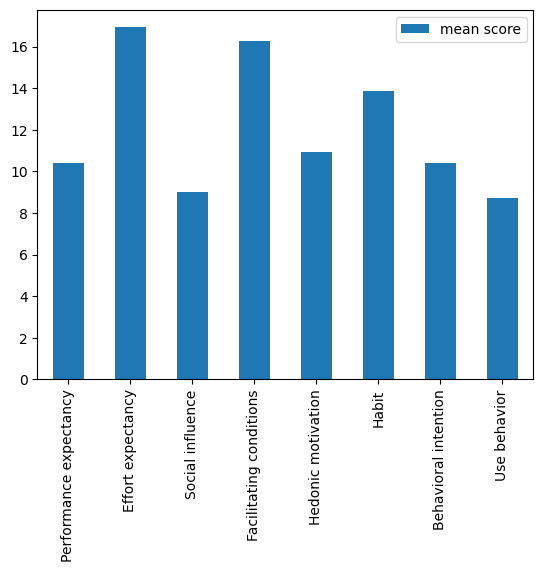

In [9]:
UTAUT2labels= ["Performance expectancy","Effort expectancy","Social influence", "Facilitating conditions","Hedonic motivation","Habit", "Behavioral intention","Use behavior"]
meanDF = pd.DataFrame({'mean score': combineData[factors].mean().to_list() }, index=UTAUT2labels)
# combineData[factors].mean().plot(kind='bar')
meanDF.plot(kind="bar")

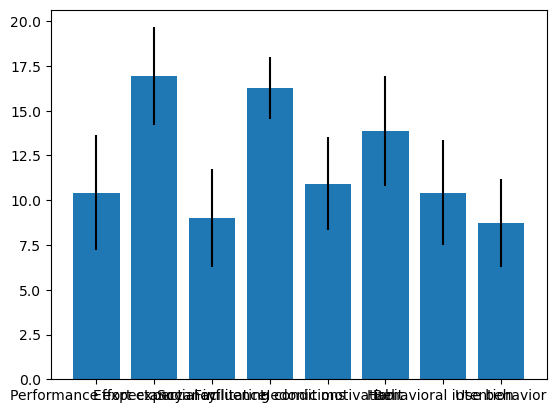

In [10]:
plt.bar(UTAUT2labels, combineData[factors].mean().to_list(), 
        yerr=combineData[factors].std().to_list()) ; plt.show()

<AxesSubplot:>

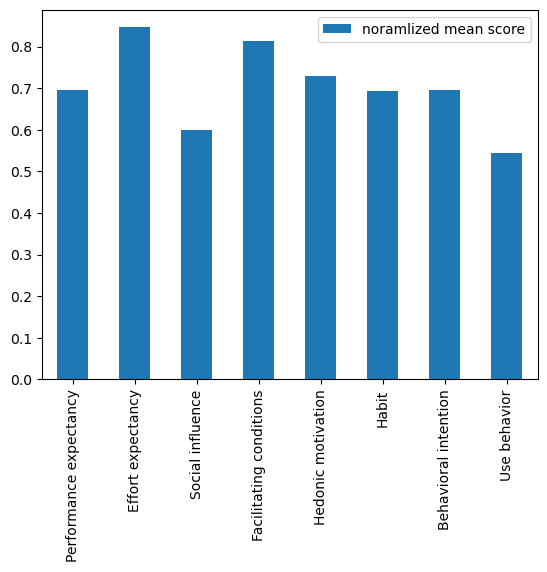

In [11]:
# combineData[factors_norm].mean().plot(kind='bar')
meanNormDF = pd.DataFrame({'noramlized mean score': combineData[factors_norm].mean().to_list() }, index=UTAUT2labels)
meanNormDF.plot(kind="bar")

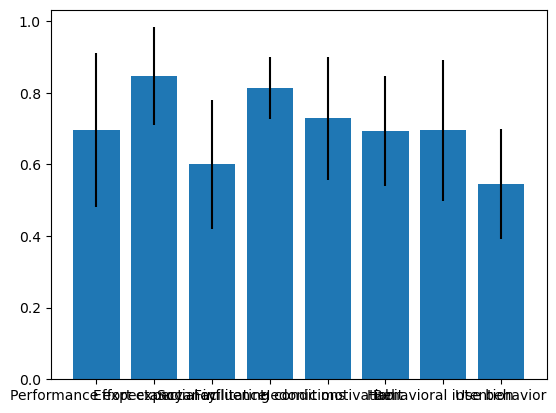

In [12]:
plt.bar(UTAUT2labels, combineData[factors_norm].mean().to_list(), 
        yerr=combineData[factors_norm].std().to_list()) ; plt.show()

In [13]:
combineData[factors].describe()

,PerfExpect,EffortExpect,SocialInf,FacilitCond,HedonicMotiv,Habit,BehavInt,Usage
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,10.428571,16.928571,9.000000,16.285714,10.928571,13.857143,10.428571,8.714286
std,3.227628,2.730576,2.717465,1.728876,2.585887,3.084880,2.953858,2.462912
min,3.000000,12.000000,6.000000,13.000000,6.000000,8.000000,6.000000,4.000000
25%,10.000000,15.250000,6.250000,16.000000,10.250000,11.500000,7.500000,7.250000
50%,11.500000,17.500000,9.000000,16.000000,11.500000,14.500000,11.500000,8.000000
75%,12.750000,19.000000,12.000000,17.750000,12.750000,15.750000,12.000000,9.750000
max,14.000000,20.000000,13.000000,19.000000,14.000000,19.000000,15.000000,14.000000


In [14]:
for i in range(1,9):
    print(factors[i-1])
    pprint(combineData[factors[i-1]].mean())

PerfExpect
10.428571428571429
EffortExpect
16.928571428571427
SocialInf
9.0
FacilitCond
16.285714285714285
HedonicMotiv
10.928571428571429
Habit
13.857142857142858
BehavInt
10.428571428571429
Usage
8.714285714285714


### Gender

In [15]:
for i in range(1,9):
    print(factors[i-1])
    pprint(combineData.groupby(['G05Q07'])[factors[i-1]].describe())

PerfExpect
        count       mean       std  min   25%   50%   75%   max
G05Q07                                                         
Femme     5.0   8.800000  4.324350  3.0   6.0  10.0  11.0  14.0
Homme     9.0  11.333333  2.236068  6.0  11.0  12.0  13.0  13.0
EffortExpect
        count       mean       std   min   25%   50%   75%   max
G05Q07                                                          
Femme     5.0  17.600000  2.792848  13.0  17.0  19.0  19.0  20.0
Homme     9.0  16.555556  2.788867  12.0  15.0  17.0  19.0  20.0
SocialInf
        count  mean       std  min  25%  50%   75%   max
G05Q07                                                  
Femme     5.0   9.0  3.000000  6.0  6.0  9.0  12.0  12.0
Homme     9.0   9.0  2.738613  6.0  7.0  9.0  12.0  13.0
FacilitCond
        count       mean       std   min   25%   50%   75%   max
G05Q07                                                          
Femme     5.0  16.200000  0.447214  16.0  16.0  16.0  16.0  17.0
Homme     9.0  

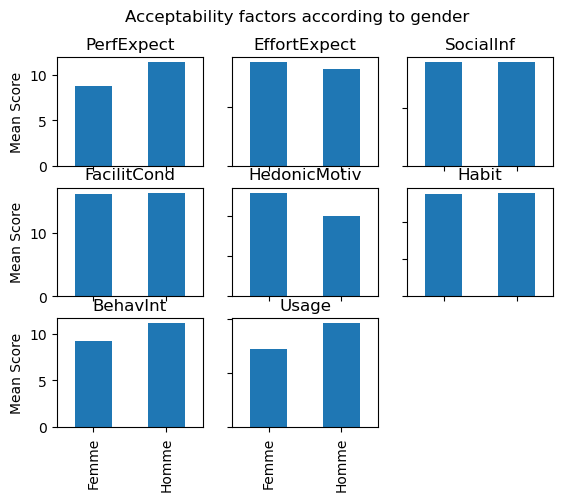

In [16]:
fig, axs = plt.subplots(3, 3)
fig.suptitle('Acceptability factors according to gender')

for i in range(1,9):
    combineData.groupby(['G05Q07'])[factors[i-1]].mean().plot(kind='bar',ylabel="Mean Score",xlabel="", title=factors[i-1], ax=axs[(i-1)//3,(i-1)%3])

axs[-1, -1].axis('off')

for ax in fig.get_axes():
    ax.label_outer()

In [17]:
mann= []
for fact in factors:
    rest_test = stats.ttest_ind(a=combineData[combineData["G05Q07"] == "Femme"][fact], b=combineData[combineData["G05Q07"] == "Homme"][fact], equal_var=False)
    print(str(fact) +": p-value = "+str(rest_test.pvalue))
    mann.append(stats.mannwhitneyu(combineData[combineData["G05Q07"] == "Femme"][fact], combineData[combineData["G05Q07"] == "Homme"][fact], method="exact"))

pprint(mann)

PerfExpect: p-value = 0.2739025442743718
EffortExpect: p-value = 0.5204088641357223
SocialInf: p-value = 1.0
FacilitCond: p-value = 0.8634015585720529
HedonicMotiv: p-value = 0.015816546650412603
Habit: p-value = 0.964442423476698
BehavInt: p-value = 0.25998934793364903
Usage: p-value = 0.08957595384641684
[MannwhitneyuResult(statistic=13.5, pvalue=0.2977022977022977),
 MannwhitneyuResult(statistic=28.5, pvalue=0.5184815184815185),
 MannwhitneyuResult(statistic=21.0, pvalue=0.8981018981018981),
 MannwhitneyuResult(statistic=18.5, pvalue=0.6993006993006993),
 MannwhitneyuResult(statistic=38.5, pvalue=0.04195804195804195),
 MannwhitneyuResult(statistic=21.5, pvalue=1.0),
 MannwhitneyuResult(statistic=14.5, pvalue=0.36363636363636365),
 MannwhitneyuResult(statistic=9.5, pvalue=0.11188811188811189)]


In [18]:
stats.mannwhitneyu(combineData[combineData["G05Q07"] == "Femme"]["HedonicMotiv"], combineData[combineData["G05Q07"] == "Homme"]["HedonicMotiv"], method="exact", alternative="greater")

MannwhitneyuResult(statistic=38.5, pvalue=0.020979020979020976)

In [39]:
cohend(combineData[combineData["G05Q07"] == "Femme"]["HedonicMotiv"], combineData[combineData["G05Q07"] == "Homme"]["HedonicMotiv"])

1.3052769163075022

### Age

In [20]:
combineData["Age_enco"] = pd.cut(combineData["G01Q08"],bins=[0,25,40,99],labels=['<25 y.o','25 to 40 y.o.','>40 y.o.'])

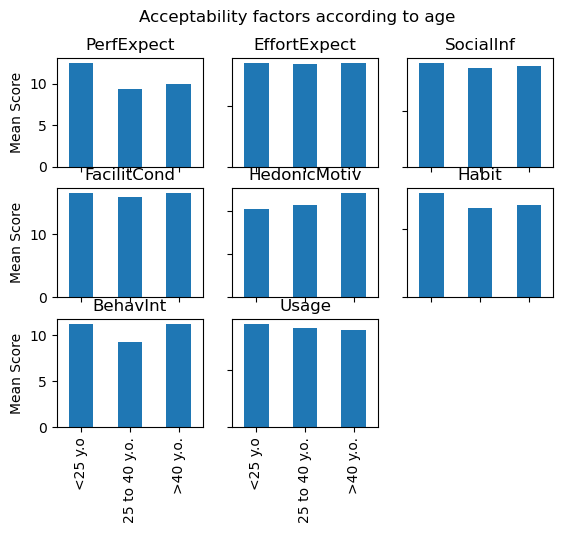

In [21]:
fig, axs = plt.subplots(3, 3)
fig.suptitle('Acceptability factors according to age')

for i in range(1,9):
    combineData.groupby(['Age_enco'])[factors[i-1]].mean().plot(kind='bar',ylabel="Mean Score",xlabel="", title=factors[i-1], ax=axs[(i-1)//3,(i-1)%3])

axs[-1, -1].axis('off')

for ax in fig.get_axes():
    ax.label_outer()

In [22]:
anova = []
for i in range(1,9):
    anova.append(stats.f_oneway( combineData.loc[combineData["Age_enco"] == "<25 y.o"][factors[i-1]], combineData.loc[combineData["Age_enco"] == "25 to 40 y.o."][factors[i-1]], combineData.loc[combineData["Age_enco"] ==">40 y.o."][factors[i-1]]))
    # ttest.append(stats.ttest_ind(a=combineData[combineData["G05Q07"] == "Femme"]["Act"+str(i)+"-clic"], b=combineData[combineData["G05Q07"] == "Homme"]["Act"+str(i)+"-clic"], equal_var=False))

pprint(anova)

[F_onewayResult(statistic=1.2509710832973673, pvalue=0.323951823969009),
 F_onewayResult(statistic=0.005409392672731743, pvalue=0.9946078558043803),
 F_onewayResult(statistic=0.023975588491717523, pvalue=0.9763604153668806),
 F_onewayResult(statistic=0.12406015037593981, pvalue=0.8845451982677437),
 F_onewayResult(statistic=0.47012041028690343, pvalue=0.6369242654350664),
 F_onewayResult(statistic=0.5437770963307603, pvalue=0.595385673692321),
 F_onewayResult(statistic=0.6870129870129872, pvalue=0.5234185863929642),
 F_onewayResult(statistic=0.036778115501519756, pvalue=0.9640079913714629)]


In [23]:
kruskal = []
for i in range(1,9):
    kruskal.append(stats.kruskal( combineData.loc[combineData["Age_enco"] == "<25 y.o"][factors[i-1]], combineData.loc[combineData["Age_enco"] == "25 to 40 y.o."][factors[i-1]], combineData.loc[combineData["Age_enco"] ==">40 y.o."][factors[i-1]]))
    # ttest.append(stats.ttest_ind(a=combineData[combineData["G05Q07"] == "Femme"]["Act"+str(i)+"-clic"], b=combineData[combineData["G05Q07"] == "Homme"]["Act"+str(i)+"-clic"], equal_var=False))

pprint(kruskal)

[KruskalResult(statistic=3.6367304804804736, pvalue=0.16229084073158354),
 KruskalResult(statistic=0.0551470588235315, pvalue=0.9728031502802192),
 KruskalResult(statistic=0.20658914728682284, pvalue=0.9018612697886921),
 KruskalResult(statistic=0.5113636363636331, pvalue=0.7743883258825057),
 KruskalResult(statistic=1.0711336336336361, pvalue=0.585337417006569),
 KruskalResult(statistic=1.4871651785714295, pvalue=0.4754076705316952),
 KruskalResult(statistic=1.4621212121212097, pvalue=0.4813981454450029),
 KruskalResult(statistic=0.09848484848484813, pvalue=0.9519503258868371)]


### Technical experience 

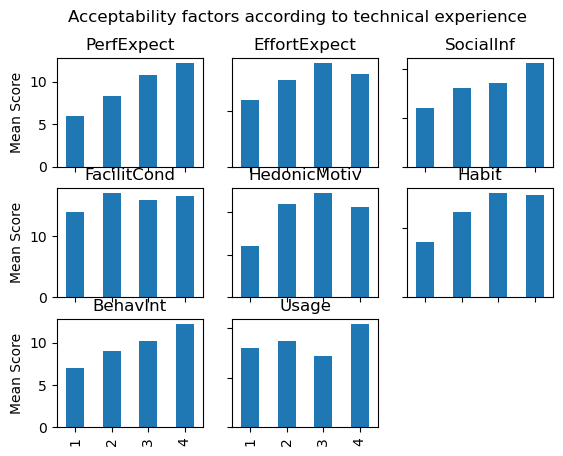

In [24]:
fig, axs = plt.subplots(3, 3)
fig.suptitle('Acceptability factors according to technical experience')

for i in range(1,9):
    combineData.groupby(['G01Q12'])[factors[i-1]].mean().plot(kind='bar',ylabel="Mean Score",xlabel="", title=factors[i-1], ax=axs[(i-1)//3,(i-1)%3])

axs[-1, -1].axis('off')

for ax in fig.get_axes():
    ax.label_outer()

In [25]:
anova = []
for i in range(1,9):
    anova.append(stats.f_oneway( combineData.loc[combineData["G01Q12"] ==1][factors[i-1]], combineData.loc[combineData["G01Q12"] ==2][factors[i-1]], combineData.loc[combineData["G01Q12"] ==3][factors[i-1]], combineData.loc[combineData["G01Q12"] ==4][factors[i-1]] ))
    # ttest.append(stats.ttest_ind(a=combineData[combineData["G05Q07"] == "Femme"]["Act"+str(i)+"-clic"], b=combineData[combineData["G05Q07"] == "Homme"]["Act"+str(i)+"-clic"], equal_var=False))

pprint(anova)

[F_onewayResult(statistic=1.8996099212482527, pvalue=0.19363661492203274),
 F_onewayResult(statistic=3.0942907667045603, pvalue=0.0763659756147531),
 F_onewayResult(statistic=1.212121212121212, pvalue=0.35515911083455304),
 F_onewayResult(statistic=0.8180708180708179, pvalue=0.5128795374505037),
 F_onewayResult(statistic=2.0326278659611994, pvalue=0.1732471404157),
 F_onewayResult(statistic=2.436922530206112, pvalue=0.12504933184309283),
 F_onewayResult(statistic=1.4166068437425223, pvalue=0.29495535917246907),
 F_onewayResult(statistic=1.657625075346594, pvalue=0.23830578192315835)]


In [26]:
anova = []
for i in range(1,9):
    anova.append(stats.kruskal( combineData.loc[combineData["G01Q12"] ==1][factors[i-1]], combineData.loc[combineData["G01Q12"] ==2][factors[i-1]], combineData.loc[combineData["G01Q12"] ==3][factors[i-1]], combineData.loc[combineData["G01Q12"] ==4][factors[i-1]] ))
    # ttest.append(stats.ttest_ind(a=combineData[combineData["G05Q07"] == "Femme"]["Act"+str(i)+"-clic"], b=combineData[combineData["G05Q07"] == "Homme"]["Act"+str(i)+"-clic"], equal_var=False))

pprint(anova)

[KruskalResult(statistic=4.364564564564559, pvalue=0.22469365226066776),
 KruskalResult(statistic=6.31960784313726, pvalue=0.09705475220271201),
 KruskalResult(statistic=4.329302325581397, pvalue=0.22803090870862217),
 KruskalResult(statistic=2.2383838383838395, pvalue=0.5244275753361665),
 KruskalResult(statistic=3.5857357357357325, pvalue=0.30981153704811043),
 KruskalResult(statistic=4.923363095238089, pvalue=0.17749566049190835),
 KruskalResult(statistic=4.123232323232323, pvalue=0.24846105391933987),
 KruskalResult(statistic=2.9387878787878816, pvalue=0.40115948726964257)]


## GCAS (attitude level)

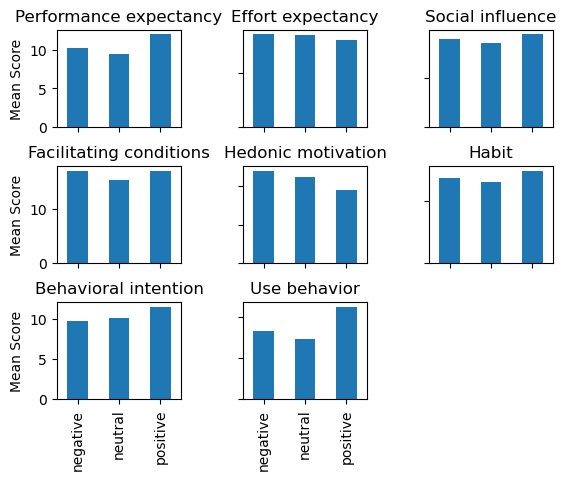

In [27]:
fig, axs = plt.subplots(3, 3)
# fig.suptitle('Acceptability factors according to the computer attitude level')

for i in range(1,9):
    combineData.groupby(['GCASLevel'])[factors[i-1]].mean().plot(kind='bar',ylabel="Mean Score",xlabel="", title=UTAUT2labels[i-1], ax=axs[(i-1)//3,(i-1)%3])

axs[-1, -1].axis('off')
plt.subplots_adjust(wspace=0.5, hspace=0.4)
for ax in fig.get_axes():
    ax.label_outer()

In [28]:
kruskal = []
for i in range(1,9):
    kruskal.append(stats.kruskal( combineData.loc[combineData["GCASLevel"] == "negative"][factors[i-1]], combineData.loc[combineData["GCASLevel"] == "neutral"][factors[i-1]], combineData.loc[combineData["GCASLevel"] =="positive"][factors[i-1]]))
    # ttest.append(stats.ttest_ind(a=combineData[combineData["G05Q07"] == "Femme"]["Act"+str(i)+"-clic"], b=combineData[combineData["G05Q07"] == "Homme"]["Act"+str(i)+"-clic"], equal_var=False))

pprint(kruskal)

[KruskalResult(statistic=2.183746246246245, pvalue=0.3355873082728513),
 KruskalResult(statistic=0.5392156862745116, pvalue=0.7636789175510325),
 KruskalResult(statistic=0.6411821705426357, pvalue=0.7257199478997334),
 KruskalResult(statistic=3.49494949494949, pvalue=0.1742133210762075),
 KruskalResult(statistic=1.3053678678678697, pvalue=0.5206465189833785),
 KruskalResult(statistic=1.1232328869047548, pvalue=0.5702864825487524),
 KruskalResult(statistic=0.9873737373737405, pvalue=0.610371879718143),
 KruskalResult(statistic=5.148295454545454, pvalue=0.0762187542905987)]


In [29]:
stats.mannwhitneyu(combineData[combineData["GCASLevel"] == "neutral"]["Usage"], combineData[combineData["GCASLevel"] == "positive"]["Usage"], method="exact", alternative="less")

MannwhitneyuResult(statistic=2.5, pvalue=0.03333333333333333)

In [41]:
cohend(combineData[combineData["GCASLevel"] == "positive"]["Usage"], combineData[combineData["GCASLevel"] == "neutral"]["Usage"])

1.8975384045494357

In [30]:
stats.mannwhitneyu(combineData[combineData["GCASLevel"] == "negative"]["Usage"], combineData[combineData["GCASLevel"] == "positive"]["Usage"], method="exact", alternative="less")

MannwhitneyuResult(statistic=2.0, pvalue=0.05714285714285714)

In [31]:
stats.mannwhitneyu(combineData[combineData["GCASLevel"] == "neutral"]["PerfExpect"], combineData[combineData["GCASLevel"] == "positive"]["PerfExpect"], method="exact", alternative="less")

MannwhitneyuResult(statistic=4.5, pvalue=0.08571428571428572)